# Lasso Regression

In [49]:
from warnings import filterwarnings
filterwarnings('ignore')

In [50]:
import pandas as pd
df = pd.read_csv('Datasets/Cars93.csv')
df.isna().sum()

Id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags               37
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

## Seperate X and Y

In [51]:
X = df.drop(columns=['Id','Weight'])
Y = df[['Weight']]

## Seperate cat con for X

In [52]:
from PM6func import catconsep
cat, con = catconsep(X)

## Create Pipeline for X

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [54]:
num_Pipeline = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                               ('scaler',StandardScaler())])
cat_Pipeline = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                               ('OHE',OneHotEncoder(handle_unknown='ignore'))])
pre = ColumnTransformer([('num',num_Pipeline,con),
                         ('cat',cat_Pipeline,cat)])
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [55]:
X_pre = pre.fit_transform(X).toarray()
X_pre

array([[-0.48578741, -0.37572014, -0.28246529, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.38801699,  1.49784409,  1.53140881, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.00865782,  0.99822696,  0.94805231, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.66378585,  0.39452293,  0.16416702, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53733279,  0.33207079,  0.14593713, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.88220476,  0.7484184 ,  0.60168439, ...,  0.        ,
         0.        ,  1.        ]], shape=(93, 256))

In [56]:
cols = pre.get_feature_names_out()
cols

array(['num__Min.Price', 'num__Price', 'num__Max.Price', 'num__MPG.city',
       'num__MPG.highway', 'num__EngineSize', 'num__Horsepower',
       'num__RPM', 'num__Rev.per.mile', 'num__Fuel.tank.capacity',
       'num__Passengers', 'num__Length', 'num__Wheelbase', 'num__Width',
       'num__Turn.circle', 'num__Rear.seat.room', 'num__Luggage.room',
       'cat__Manufacturer_Acura', 'cat__Manufacturer_Audi',
       'cat__Manufacturer_BMW', 'cat__Manufacturer_Buick',
       'cat__Manufacturer_Cadillac', 'cat__Manufacturer_Chevrolet',
       'cat__Manufacturer_Chrylser', 'cat__Manufacturer_Chrysler',
       'cat__Manufacturer_Dodge', 'cat__Manufacturer_Eagle',
       'cat__Manufacturer_Ford', 'cat__Manufacturer_Geo',
       'cat__Manufacturer_Honda', 'cat__Manufacturer_Hyundai',
       'cat__Manufacturer_Infiniti', 'cat__Manufacturer_Lexus',
       'cat__Manufacturer_Lincoln', 'cat__Manufacturer_Mazda',
       'cat__Manufacturer_Mercedes-Benz', 'cat__Manufacturer_Mercury',
       'cat__Man

In [57]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Train Test Split

In [58]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre,Y, test_size=0.2, random_state=10)

Train Base model

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [60]:
model.score(xtrain,ytrain)

1.0

In [61]:
model.score(xtest,ytest)

0.8492815997819178

## now train Lasso model

In [62]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=12)
ls.fit(xtrain,ytrain)

,alpha,12
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [63]:
from PM6func import evaluate_model
evaluate_model(xtrain,xtest,ytrain,ytest,ls)

Metrics of Train Data
MSE: 14374.26
MAE: 94.93
RMSE: 119.89
R2: 0.96


Metrics of Test Data
MSE: 26002.22
MAE: 124.59
RMSE: 161.25
R2: 0.89


In [64]:
import numpy as np
alphas = np.arange(0.1,100,0.1)
alphas

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
       11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
       12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
       13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
       14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15

In [65]:
from sklearn.metrics import mean_squared_error
tr =[]
ts =[]
for i  in alphas:
    ls = Lasso(alpha=i)
    ls.fit(xtrain, ytrain)
    ypred_tr = ls.predict(xtrain)
    ypred_ts = ls.predict(xtest)

    tr.append(mean_squared_error(ytrain, ypred_tr))
    ts.append(mean_squared_error(ytest, ypred_ts))

In [66]:
tr[0:5]

[36.1013677872786,
 138.35398840201944,
 301.6157898208674,
 519.5505405479502,
 783.528665343615]

In [67]:
ts[0:5]

[40379.89084019298,
 42348.60671868544,
 44021.62406294222,
 44906.35979727134,
 45056.60832929353]

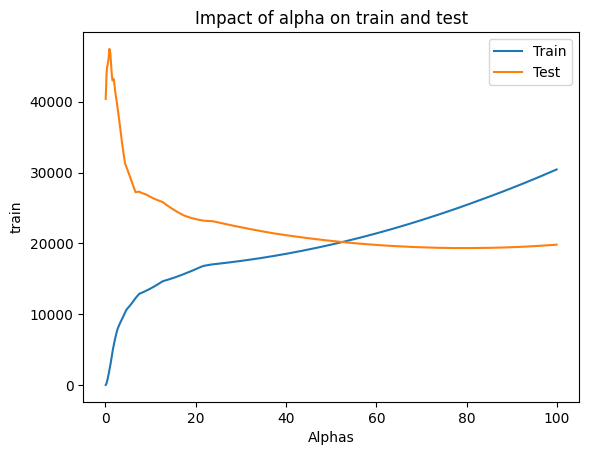

In [68]:
import matplotlib.pyplot as plt
plt.plot(alphas,tr,label='Train')
plt.plot(alphas, ts, label='Test')
plt.legend()
plt.xlabel('Alphas')
plt.ylabel('train')
plt.title('Impact of alpha on train and test')
plt.show()

## Find Optimal alpha

In [69]:
for i  in alphas:
    ls = Lasso(alpha=i)
    ls.fit(xtrain, ytrain)
    ypred_tr = ls.predict(xtrain)
    ypred_ts = ls.predict(xtest)

    tr=mean_squared_error(ytrain, ypred_tr)
    ts=mean_squared_error(ytest, ypred_ts)
    if tr>ts:
        opt_ls= i
        print("Opptimal alpha :",opt_ls)
        break

Opptimal alpha : 52.50000000000001


In [70]:
best_ls = Lasso(alpha=opt_ls)
best_ls.fit(xtrain,ytrain)

,alpha,np.float64(52.50000000000001)
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [71]:
evaluate_model(xtrain,xtest,ytrain,ytest,best_ls)

Metrics of Train Data
MSE: 20199.92
MAE: 110.21
RMSE: 142.13
R2: 0.95


Metrics of Test Data
MSE: 20192.95
MAE: 108.26
RMSE: 142.10
R2: 0.91
